### **Universidad Galileo**
### **Postgrado en Análisis y Predicción de Datos** - *Tercer Trimestre 2024*
### **Statistical Learning II**
### **Alumno:** Elder Cruz. **Carnet:** 23004456
### **Alumno:** Walter Reyes. **Carnet:** 23004450
### **Proyecto final:** **Text Mining and Image Recognition**

### **1. Problema 1** Word Cloud
#### Usando CoLab y expresiones regulares determine los 3 usuarios más populares dentro del dataset. Luego construya un corpus que contenga los siguientes elementos por cada usuario seleccionado:
#### Content: Tweet
#### Metadata: ID, Timestamp, Length (calcular valor)

#### Posterior a tener los 3 corpus creados, responder ¿el motivo por el cual citan a este usuario?. Para esto es necesario extraer el contexto de cada tweet y verifique cuales son las palabras que más rodean al nombre de usuario.  Para extraer un contexto válido y debido a la naturaleza del tipo de datos que están disponibles en el dataset se recomienda los siguientes pasos 1. Remover stopwords 2. Realizar stemming y lemmatization 3. Mostrar un wordcloud con el top 10 para cada usuario.

#### **1.1 Importar librerías**

In [ ]:
import pandas as pd
import numpy as np
import re

#### **1.2 Carga de dataset**

In [ ]:
# montar unidad de drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Proyecto_TxtMngImg/tw_source.csv',
                      encoding= 'latin_1', header = None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']
dataset.head()

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### **1.3 Exploración de dataset**

In [ ]:
#dataset = dataset['tweet']
#dataset.shape

#### 1.4 **Comprehension**

##### Extracción de una lista string por separado de cada palabra, **comprehension**
##### Se hace una lista con las palabras del tweet y las que tiene la letra arroba las extrae en forma de **comprehension**, más lento y con la cantidad de información que se tiene en el dataset, puede ser complejo

In [ ]:
from collections import Counter

#### **1.5 Función lista de menciones** por tweet

In [ ]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in dataset['tweet']:
  ats_in_tweet = [palabra for palabra in tweet.split(' ') if '@' in palabra]
  lista_menciones.extend(ats_in_tweet)

  try:
    ultimo_at = ats_in_tweet[len(ats_in_tweet)-1]
    filas_per_at.setdefault(ultimo_at,[]).append(cont)

  except:
    pass
  finally:
    cont = cont + 1

In [ ]:
filas_per_at

{'@switchfoot': [0,
  122396,
  204318,
  532683,
  665568,
  792721,
  854059,
  904038,
  914966,
  1374695,
  1504823],
 '@Kenichan': [2,
  57116,
  199137,
  472424,
  792505,
  792852,
  801886,
  822783,
  910747,
  994374,
  995103,
  1143200,
  1186198],
 '@nationwideclass': [4,
  837013,
  838724,
  861205,
  1083926,
  1084349,
  1136751,
  1245113,
  1353577,
  1534845],
 '@Kwesidei': [5],
 '@LOLTrish': [7, 1533551],
 '@Tatiana_K': [8, 91831, 206627, 225987, 456474, 592898, 899631, 1055959],
 '@twittera': [9, 639600, 898489],
 '@caregiving': [12, 1015505],
 '@octolinz16': [13],
 '@smarrison': [14],
 '@iamlilnicki': [15],
 '@LettyA': [18, 198834, 326284],
 '@FakerPattyPattz': [19, 1251980],
 '@alydesigns': [20],
 '@angry_barista': [22],
 '@alielayus': [31],
 '@julieebaby': [33, 502801],
 '@HumpNinja': [34, 979506],
 '@cocomix04': [36],
 '@MissXu': [37,
  314455,
  476832,
  486332,
  804695,
  849531,
  861941,
  911735,
  912205,
  913773,
  971299,
  1007081,
  1027091,
  1

In [ ]:
Counter(lista_menciones)

Counter({'@switchfoot': 12,
         '@Kenichan': 17,
         '@nationwideclass': 12,
         '@Kwesidei': 1,
         '@LOLTrish': 2,
         '@Tatiana_K': 8,
         '@twittera': 3,
         '@caregiving': 2,
         '@octolinz16': 1,
         '@smarrison': 1,
         '@iamjazzyfizzle': 1,
         '@iamlilnicki': 1,
         '@LettyA': 3,
         '@FakerPattyPattz': 2,
         '@alydesigns': 1,
         '@angry_barista': 1,
         '@alielayus': 1,
         '@julieebaby': 2,
         '@HumpNinja': 2,
         '@cocomix04': 1,
         '@MissXu': 15,
         '@fleurylis': 2,
         '@JonathanRKnight': 1053,
         '@Viennah': 6,
         "@jeancjumbe's": 1,
         '@tea': 1,
         '@localtweeps': 3,
         '@andywana': 1,
         '@oanhLove': 8,
         '@BatManYNG': 3,
         '@Starrbby': 8,
         '@katortiz': 2,
         '@Lt_Algonquin': 11,
         '@jdarter': 1,
         '@ninjen': 15,
         '@ashleyac': 3,
         '@statravelAU': 1,
         '@ma

In [ ]:
contador_menciones = Counter(lista_menciones)
usuarios_mas_mencionados = contador_menciones.most_common(4)[1:]

In [ ]:
usuarios_mas_mencionados

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

In [ ]:
filas_mileycyrus = filas_per_at['@mileycyrus']
filas_mileycyrus[:10]

[1021, 2014, 2073, 2080, 2156, 2220, 2275, 2461, 3859, 4191]

In [ ]:
dataset.iloc[1021,5]

'@mileycyrus hahaha dont be like that one time in NY when you got 30 mins of sleep then got sick  love you!!'

#### **1.6 Corpus Usuarios más mencionados**

#### **1.6.1 @mileycyrus corpus**

In [ ]:
corpus_mileycyrus = dataset.iloc[filas_mileycyrus,[2,5]].reset_index()
corpus_mileycyrus['tweet_length'] = corpus_mileycyrus['tweet'].apply(len)
corpus_mileycyrus

,index,fecha,tweet,tweet_length
0,1021,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107
1,2014,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137
2,2073,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72
3,2080,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100
4,2156,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112
...,...,...,...,...
4096,1595291,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...,104
4097,1596796,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...,112
4098,1597905,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...,74
4099,1598348,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...,139


#### **1.6.2 @tommcfly corpus**

In [ ]:
filas_tommcfly = filas_per_at['@tommcfly']
filas_tommcfly[:10]

corpus_tommcfly = dataset.iloc[filas_tommcfly,[2,5]].reset_index()
corpus_tommcfly['tweet_length'] = corpus_tommcfly['tweet'].apply(len)
corpus_tommcfly

,index,fecha,tweet,tweet_length
0,1789,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...,131
1,2514,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...,96
2,3029,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ...",108
3,3524,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or...",131
4,3783,Tue Apr 07 03:05:49 PDT 2009,"@tommcfly have fun tom, i need to buy eclipse ...",82
...,...,...,...,...
3646,1594946,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB,46
3647,1595131,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...,125
3648,1595194,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...,71
3649,1597053,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...,102


#### **1.6.3 @ddlovato corpus**

In [ ]:
filas_ddlovato = filas_per_at['@ddlovato']
filas_ddlovato[:10]

corpus_ddlovato = dataset.iloc[filas_ddlovato,[2,5]].reset_index()
corpus_ddlovato['tweet_length'] = corpus_ddlovato['tweet'].apply(len)
corpus_ddlovato

,index,fecha,tweet,tweet_length
0,573,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't,40
1,7032,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...,96
2,7089,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon...",79
3,8611,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...,85
4,9492,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...,116
...,...,...,...,...
3150,1590266,Tue Jun 16 05:08:09 PDT 2009,@ddlovato is there a deluxe edition cause then...,92
3151,1590351,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y...",72
3152,1592766,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon,31
3153,1593330,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait,36


#### **1.7 proceso WordCloud**

In [ ]:
import spacy.cli

#### 1.7.1 Descarga de modelo de lenguaje a usar en este caso inglés para los tweets

In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#### 1.7.2 Creación de objeto que contiene modelo de lenguaje "ingles"

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp

#### 1.7.3 Normalización

In [ ]:
corpus1 = corpus_mileycyrus['tweet'].replace(to_replace=r'@\w+', value='', regex=True)

corpus1.head()

,tweet
0,hahaha dont be like that one time in NY when ...
1,"i have the same problem, but it's 4:43 here....."
2,I guess counting sheep didn't work Hope you ...
3,I would too if it meant spending a day in hea...
4,AWWW u seriously have the cutest dog Miley! S...


In [ ]:
corpus2 = corpus_tommcfly['tweet'].replace(to_replace=r'@\w+', value='', regex=True)

corpus2.head()

,tweet
0,Good morning Tom! Why can't I send you a mess...
1,did you know that johnsons baby use animals l...
2,"good morning guys, how are you all? You know..."
3,"hey, no chance of adding brighton or eastbour..."
4,"have fun tom, i need to buy eclipse too but i..."


In [ ]:
corpus3 = corpus_ddlovato['tweet'].replace(to_replace=r'@\w+', value='', regex=True)

corpus3.head()

,tweet
0,Do you hate us?? Please don't
1,Wish that i could see it.. Thats the downsid...
2,"hey demi, wen are you and selena gonna do ano..."
3,ahhhh i wish i could go to the dallas show......
4,I just saw your tour dates and now I am sad.....


In [ ]:
def normalizacion_texto(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(re.sub(r'[^a-zA-z0-9\s{1}]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return new_corpus

In [ ]:
corpus1[100]

' i wish!  but i hope you have fuun!! if you come to maryland or north carolina, im so there! '

In [ ]:
corpus1 = normalizacion_texto(corpus1)

In [ ]:
corpus1[100]

'i wish  but i hope you have fuun if you come to maryland or north carolina im so there'

In [ ]:
corpus2[100]

' umm dunno im dippy lol i aint seen u on t4 yet '

In [ ]:
corpus2 = normalizacion_texto(corpus2)

In [ ]:
corpus2[100]

'umm dunno im dippy lol i aint seen u on t4 yet'

In [ ]:
corpus3 = normalizacion_texto(corpus3)
corpus3[100]

'i be scared of this movie well not much but have'

#### 1.7.3 Tokenization

In [ ]:
def tokenizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(nlp(doc))
  return new_corpus

In [ ]:
corpus1 = tokenizacion(corpus1)

In [ ]:
corpus1

[hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you,
 i have the same problem but its 443 here lets see if counting works123456 57 58 132 133 134 no zs for me,
 i guess counting sheep didnt work  hope you get some sleep,
 i would too if it meant spending a day in heaven wmy mom and getting to see her again,
 awww u seriously have the cutest dog miley sorry your not with her now  hope u get some sleep xoxo,
 httptwitpiccom2xszg  napping at this point you may need a few of those gma is gonna come early,
 where did you find that quote no dont answer better sleep xoxo from germany where its already morning,
 httptwitpiccom2y606  i want a sofie  shes helllza cute,
 ouch mine too,
 dude i have to go on a 4 mile run in cold ass boston after waking up just now this sucks,
 aww i feel u u just woke up for school  hopefully ill meet u today hah lt3,
 awe i feel u i just woke up for school  hopefully we both have a better rest of the day amp i hope that 

In [ ]:
corpus2 = tokenizacion(corpus2)
corpus3 = tokenizacion(corpus3)

corpus2
corpus3

[do you hate us please dont,
 wish that i could see it  thats the downside of living in sweden good luck anyway,
 hey demi wen are you and selena gonna do another video i miss them,
 ahhhh i wish i could go to the dallas showbut i wont be near there then,
 i just saw your tour dates and now i am sadyou come to houston two days before i get home from vacation,
 sonny with a chance in the uk only 6 more days i cant wait but ill miss it im at the mcfly concert  hmm  ill record it,
 demii how is your stage going to be i dont know what kind of seats to look for when i buy them on tuesdayy,
 hi demi at which airport in germany were you if you were in munich i missed you by like a day  if youd answer thatll be grea,
 awww why omg i really wana c ure new show but it is not out here,
 hey demi why do you not come to austria,
 whyy is not my fault my parents are busy for 1th time  i feel upset  u,
 hihow long are you in london i have uni lectures during your show on wednesday,
 do u even get to 

In [ ]:
type(corpus1[1])

spacy.tokens.doc.Doc

In [ ]:
type(corpus2[1])

spacy.tokens.doc.Doc

In [ ]:
type(corpus3[1])

spacy.tokens.doc.Doc

In [ ]:
type(corpus1[1][0])

spacy.tokens.token.Token

In [ ]:
corpus1[1][1].is_stop

True

In [ ]:
corpus1[100]

i wish  but i hope you have fuun if you come to maryland or north carolina im so there

In [ ]:
corpus2[100]


umm dunno im dippy lol i aint seen u on t4 yet

In [ ]:
corpus3[100]

i be scared of this movie well not much but have

#### 1.7.4 Remover stopwords

In [ ]:
def remove_stopwords(documentos):
  new_corpus= []
  for doc in documentos:
    s = ''
    for token in doc:
      if(token.is_stop == False):
        s = s + token.text + ' '
    new_corpus.append(nlp(s.strip()))
  return new_corpus

In [ ]:
corpus1 = remove_stopwords(corpus1)

In [ ]:
corpus1[100]

wish   hope fuun come maryland north carolina m

In [ ]:
corpus2 = remove_stopwords(corpus2)
corpus3 = remove_stopwords(corpus3)

In [ ]:
corpus2[100]

umm dunno m dippy lol ai nt seen u t4

In [ ]:
corpus3[100]

scared movie

#### 1.7.5 Stemming y Lemmatization

In [ ]:
def stemming_lemmatization(documentos):
  new_corpus= []
  for doc in documentos:
    s = ''
    for token in doc:
        s = s + token.lemma_ + ' '
    new_corpus.append(s.strip())
  return new_corpus

In [ ]:
corpus1 = stemming_lemmatization(corpus1)

In [ ]:
corpus1[100]

'wish    hope fuun come maryland north carolina m'

In [ ]:
corpus2 = stemming_lemmatization(corpus2)
corpus3 = stemming_lemmatization(corpus3)

In [ ]:
corpus2[100]

'umm dunno m dippy lol be not see u t4'

In [ ]:
corpus3[100]

'scared movie'

#### 1.7.6 Matriz TF-IDF

In [ ]:
def corpus_to_string(documentos):
  str_out= ''
  for doc in documentos:
    str_out = str_out + doc + ' '
  return str_out

In [ ]:
str_corpus1 = corpus_to_string(corpus1)
str_corpus1

'hahaha not like time ny get 30 min sleep get sick    love problem 443 let count works123456 57 58 132 133 134 z guess count sheep not work    hope sleep mean spending day heaven wmy mom get awww u seriously cut dog miley sorry    hope u sleep xoxo httptwitpiccom2xszg    napping point need gma go to come early find quote not answer well sleep xoxo germany morning httptwitpiccom2y606    want sofie    s helllza cute ouch dude 4 mile run cold ass boston waking suck aww feel u u wake school    hopefully ill meet u today hah lt3 awe feel u wake school    hopefully well rest day amp hope include meet u lol wow early start not bed hope tummy feel well soon    love aussie fan    xxx come reply aww    chin hun god blizzard good luck wish thereee school ugh billy ray new album fantastic m listen itune d buy aus    come tyra watch online nt uk not think miley tummy hurt head hurt sound like pound head d like madrid think possible     ill watch tuesday quotel hormigueroquot love answer m number fa

In [ ]:
str_corpus2 = corpus_to_string(corpus2)
str_corpus2

'good morning tom not send message short question    bad guess know johnson baby use animal like cute bunny test product good morning guy know frustrating reply hey chance add brighton eastbourne ucap tour gutte m miss time round    love guy fun tom need buy eclipse money sad timess come play plymouth year cus nt ucap tour cus not come near    oxo o starbuck tehe oooh want aw want starbuck read eclipse not watch twilight movie want like book movie bad httptwitpiccom3iquy    miss old hairstyle daniel    look great hope love amsterdam enjoy sunbathe lol cloudy america wish d guy awww    come go star trek premier xx feel sad nt travel guy amsterdam    come norway soon awww ve try    play radio    play u know love brazil country    m jealous love hope ll come germany day like guy live day go to come sweden    x hey tommy concert amsterdam wish not     srry love xoxo comin home tomorrow weather rubbish today newcastle not twitter gig tom m upset time zonesi start get morning tweet bed    so

In [ ]:
str_corpus3 = corpus_to_string(corpus3)
str_corpus3

'hate not wish    s downside live sweden good luck hey demi wen selena go to video miss ahhhh wish dallas showbut will not near see tour date sadyou come houston day home vacation sonny chance uk 6 day not wait ill miss m mcfly concert    hmm    ill record demii stage going not know kind seat look buy tuesdayy hi demi airport germany munich miss like day    d answer ll grea awww omg wana c ure new hey demi come austria whyy fault parent busy 1th time    feel upset    u hihow long london uni lecture wednesday u know message miss toooooooo    xoxo hey demi come austria    yeah wish good flight hey demi come austria    yeah wish good flight ilove ou demi great wish reply mee wish come toronto wish concert fruckin luv u lt3333     ur funny ur xd wish meet u person germany toobaumholder    see celebrity concert cept lil jon think    come belgium roflll not dead talk    will not    demi love lolll m angry not come concert demi not wait travel know feel america europe nightmare madrid omg hah

In [ ]:
len(str_corpus1)

170852

In [ ]:
len(str_corpus2)

153960

In [ ]:
len(str_corpus3)

135700

In [ ]:
set_corpus1 = str_corpus1.strip().split(' ') #va a separar todas las palabras con un espacio en blanco
set_corpus1

['hahaha',
 'not',
 'like',
 'time',
 'ny',
 'get',
 '30',
 'min',
 'sleep',
 'get',
 'sick',
 '',
 '',
 '',
 'love',
 'problem',
 '443',
 'let',
 'count',
 'works123456',
 '57',
 '58',
 '132',
 '133',
 '134',
 'z',
 'guess',
 'count',
 'sheep',
 'not',
 'work',
 '',
 '',
 '',
 'hope',
 'sleep',
 'mean',
 'spending',
 'day',
 'heaven',
 'wmy',
 'mom',
 'get',
 'awww',
 'u',
 'seriously',
 'cut',
 'dog',
 'miley',
 'sorry',
 '',
 '',
 '',
 'hope',
 'u',
 'sleep',
 'xoxo',
 'httptwitpiccom2xszg',
 '',
 '',
 '',
 'napping',
 'point',
 'need',
 'gma',
 'go',
 'to',
 'come',
 'early',
 'find',
 'quote',
 'not',
 'answer',
 'well',
 'sleep',
 'xoxo',
 'germany',
 'morning',
 'httptwitpiccom2y606',
 '',
 '',
 '',
 'want',
 'sofie',
 '',
 '',
 '',
 's',
 'helllza',
 'cute',
 'ouch',
 'dude',
 '4',
 'mile',
 'run',
 'cold',
 'ass',
 'boston',
 'waking',
 'suck',
 'aww',
 'feel',
 'u',
 'u',
 'wake',
 'school',
 '',
 '',
 '',
 'hopefully',
 'ill',
 'meet',
 'u',
 'today',
 'hah',
 'lt3',
 'awe',

In [ ]:
set_corpus2 = str_corpus2.strip().split(' ') #va a separar todas las palabras con un espacio en blanco
set_corpus2

['good',
 'morning',
 'tom',
 'not',
 'send',
 'message',
 'short',
 'question',
 '',
 '',
 '',
 'bad',
 'guess',
 'know',
 'johnson',
 'baby',
 'use',
 'animal',
 'like',
 'cute',
 'bunny',
 'test',
 'product',
 'good',
 'morning',
 'guy',
 'know',
 'frustrating',
 'reply',
 'hey',
 'chance',
 'add',
 'brighton',
 'eastbourne',
 'ucap',
 'tour',
 'gutte',
 'm',
 'miss',
 'time',
 'round',
 '',
 '',
 '',
 'love',
 'guy',
 'fun',
 'tom',
 'need',
 'buy',
 'eclipse',
 'money',
 'sad',
 'timess',
 'come',
 'play',
 'plymouth',
 'year',
 'cus',
 'nt',
 'ucap',
 'tour',
 'cus',
 'not',
 'come',
 'near',
 '',
 '',
 '',
 'oxo',
 'o',
 'starbuck',
 'tehe',
 'oooh',
 'want',
 'aw',
 'want',
 'starbuck',
 'read',
 'eclipse',
 'not',
 'watch',
 'twilight',
 'movie',
 'want',
 'like',
 'book',
 'movie',
 'bad',
 'httptwitpiccom3iquy',
 '',
 '',
 '',
 'miss',
 'old',
 'hairstyle',
 'daniel',
 '',
 '',
 '',
 'look',
 'great',
 'hope',
 'love',
 'amsterdam',
 'enjoy',
 'sunbathe',
 'lol',
 'cloudy',


In [ ]:
set_corpus3 = str_corpus3.strip().split(' ') #va a separar todas las palabras con un espacio en blanco
set_corpus3

['hate',
 'not',
 'wish',
 '',
 '',
 '',
 's',
 'downside',
 'live',
 'sweden',
 'good',
 'luck',
 'hey',
 'demi',
 'wen',
 'selena',
 'go',
 'to',
 'video',
 'miss',
 'ahhhh',
 'wish',
 'dallas',
 'showbut',
 'will',
 'not',
 'near',
 'see',
 'tour',
 'date',
 'sadyou',
 'come',
 'houston',
 'day',
 'home',
 'vacation',
 'sonny',
 'chance',
 'uk',
 '6',
 'day',
 'not',
 'wait',
 'ill',
 'miss',
 'm',
 'mcfly',
 'concert',
 '',
 '',
 '',
 'hmm',
 '',
 '',
 '',
 'ill',
 'record',
 'demii',
 'stage',
 'going',
 'not',
 'know',
 'kind',
 'seat',
 'look',
 'buy',
 'tuesdayy',
 'hi',
 'demi',
 'airport',
 'germany',
 'munich',
 'miss',
 'like',
 'day',
 '',
 '',
 '',
 'd',
 'answer',
 'll',
 'grea',
 'awww',
 'omg',
 'wana',
 'c',
 'ure',
 'new',
 'hey',
 'demi',
 'come',
 'austria',
 'whyy',
 'fault',
 'parent',
 'busy',
 '1th',
 'time',
 '',
 '',
 '',
 'feel',
 'upset',
 '',
 '',
 '',
 'u',
 'hihow',
 'long',
 'london',
 'uni',
 'lecture',
 'wednesday',
 'u',
 'know',
 'message',
 'miss',

In [ ]:
len(set_corpus1)

37174

In [ ]:
len(set_corpus2)

33424

In [ ]:
len(set_corpus3)

29238

In [ ]:
set_corpus1 = set(str_corpus1.strip().split(' '))
set_corpus1

{'',
 'canadas',
 'awards',
 'michel',
 'closed',
 'voption',
 'scrummy',
 'dog',
 'neeeed',
 'crud',
 'cansadinha',
 'wonn',
 'lizzie',
 'whaaaaat',
 'omgi',
 'hugee',
 'foot',
 'sibling',
 'hater',
 'affection',
 'itsitsit',
 'lov',
 '3year',
 'disconnect',
 'stuff',
 'alredy',
 'revlon',
 'conert',
 'extra',
 'amazin',
 'kill',
 'dashboard',
 'monday',
 'going',
 'van',
 'fix',
 'beahtuful',
 'fun',
 'totally',
 'alot',
 'wrapping',
 'yur',
 'intreste',
 'awesomeeeee',
 'makesan',
 'pain',
 'gagas',
 'absolutly',
 'magazine',
 'comeon',
 'hail',
 'bathtube',
 'soonwe',
 'heyyah',
 'quote',
 'starstruckk',
 'eventually',
 'pleaseremember',
 'join',
 'sadness',
 'todaysneak',
 'hard',
 'membership',
 'sure',
 'amm',
 'year',
 'rockkkksss',
 'touching',
 'inspirational',
 'soooooooo',
 'decemberr',
 'jeeeeeez',
 'diva',
 'audi',
 'ny',
 'artist',
 'strip',
 'httptwitpiccom6s6m2',
 'winshe',
 'll',
 'shock',
 'bit',
 'cutee',
 'lewis',
 'coffee',
 '1st',
 'head',
 'scandal',
 'everythin

In [ ]:
set_corpus2 = set(str_corpus2.strip().split(' '))
set_corpus2

{'',
 'awards',
 'ui',
 'dog',
 'sleepnot',
 'eyestour',
 'bbz',
 'uganda',
 'currentquot',
 'hater',
 'stephenie',
 'lov',
 'ucattip',
 'boringim',
 'depend',
 'alredy',
 'stuff',
 'amazin',
 'extra',
 'van',
 'monday',
 'kill',
 'going',
 'pity',
 'slip',
 'absolute',
 'fix',
 'writtenquot',
 'ahahahhaha',
 'fun',
 'totally',
 'alot',
 'foodhaha',
 'sensitive',
 'southend',
 'visitingchile',
 'pain',
 'absolutly',
 'magazine',
 'invalid',
 'haveeeeee',
 'vetshe',
 'quote',
 'expression',
 'flercher',
 'join',
 'hard',
 'sure',
 'year',
 'non',
 'touching',
 'promote',
 'weeeheeyy',
 'ignorin',
 'nighti',
 'swimming',
 'ny',
 'aand',
 'll',
 'shock',
 'bit',
 'plase',
 'coffee',
 '1st',
 'ffs',
 'lewis',
 'head',
 'happpy',
 'goognight',
 'brother',
 'store',
 'legend',
 'receibe',
 'flag',
 'soow',
 'bestest',
 'ahhhhhhh',
 'meal',
 'w',
 'craving',
 'lets',
 'httpbitly2s3xlc',
 'rly',
 'uk',
 'youand',
 'buah',
 'dedicated',
 'ooft',
 'whalst',
 'ow',
 'nd',
 'somethin',
 'httpwwwmy

In [ ]:
set_corpus3 = set(str_corpus3.strip().split(' '))
set_corpus3

{'',
 'awards',
 'bow',
 'closed',
 'purchase',
 'dog',
 'httptwitpiccom4kzlp',
 'httptwitpiccom69zm9',
 'zhu',
 'xoxoo',
 'httptinyurlcomnw77v6',
 'lizzie',
 'foot',
 'hater',
 'httptinyurlcomag4qpb',
 'muy',
 'ohhhh',
 'stuff',
 'concentration',
 'amazin',
 'extra',
 'kill',
 'pity',
 'monday',
 'going',
 'fix',
 'rapid',
 'hihow',
 'fun',
 'alot',
 'totally',
 'yur',
 'canti',
 'pain',
 'topshopaholic',
 'magazine',
 'celebritybe',
 'peoplex',
 'knowdo',
 'quote',
 'starstruckk',
 'livin',
 'lt333333',
 'join',
 'sadness',
 'hard',
 'sure',
 'tryie',
 'year',
 'inspirational',
 'soooooooo',
 'collide',
 'httpbitlytvz4o',
 'diva',
 'ny',
 'artist',
 'utah',
 'gf',
 'befor',
 'll',
 'bit',
 'breakup',
 '1st',
 'y0u',
 'coffee',
 'evrythe',
 'head',
 'luvin',
 'kidsuntil',
 'brother',
 'store',
 'legend',
 'yellow',
 'riiight',
 'maturity',
 'skinny',
 'bestest',
 'dontfollowsunday',
 'w',
 'purpose',
 'rly',
 'uk',
 'youand',
 'whoooouuu',
 'boywere',
 'httpi40tinypiccom30urfbspng',
 

In [ ]:
len(set_corpus1)

4503

In [ ]:
len(set_corpus2)

4089

In [ ]:
len(set_corpus3)

4019

#### 1.7.7 Construir Matriz TF-IDF vacía

In [ ]:
col_names = list(set_corpus1)
row_names = range(0, len(corpus1))

tf_idf_matrix = pd.DataFrame(index = row_names, columns = col_names)
tf_idf_matrix.fillna(0.0, inplace = True)
tf_idf_matrix.head()

,,canadas,awards,michel,closed,voption,scrummy,dog,neeeed,crud,...,unfollow,deserve,successful,open,official,tissue,dull,httptwitpiccom3o5f1,knowshe,httptwitpiccom3uixz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_names = list(set_corpus2)
row_names = range(0, len(corpus2))

tf_idf_matrix2 = pd.DataFrame(index = row_names, columns = col_names)
tf_idf_matrix2.fillna(0.0, inplace = True)
tf_idf_matrix2.head()

,,awards,ui,dog,sleepnot,eyestour,bbz,uganda,currentquot,hater,...,deserve,open,official,pmouth,launch,domingo,merch,squashed,crie,hahaabsolutely
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_names = list(set_corpus3)
row_names = range(0, len(corpus3))

tf_idf_matrix3 = pd.DataFrame(index = row_names, columns = col_names)
tf_idf_matrix3.fillna(0.0, inplace = True)
tf_idf_matrix3.head()

,,awards,bow,closed,purchase,dog,httptwitpiccom4kzlp,httptwitpiccom69zm9,zhu,xoxoo,...,cavalcade,goos,open,ftr,official,tissue,ithiink,plese,downtown,plzi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.7.8 Calculo Matriz TF-IDF

In [ ]:
def calculo_tf(documentos, df):
  for index, doc in enumerate(documentos):
    doc = doc.split(' ')
    doc_size = len(doc)
    for token in doc:
      try:
        df.loc[index, token] = df.loc[index,token] + 1
      except:
        pass
    df.iloc[index, :] = (df.iloc[index, :]/doc_size).astype(float)
  return df

In [ ]:
tf_matrix = calculo_tf(corpus1, tf_idf_matrix)
tf_matrix.head()

,,canadas,awards,michel,closed,voption,scrummy,dog,neeeed,crud,...,unfollow,deserve,successful,open,official,tissue,dull,httptwitpiccom3o5f1,knowshe,httptwitpiccom3uixz
0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_matrix2 = calculo_tf(corpus2, tf_idf_matrix2)
tf_matrix2.head()

,,awards,ui,dog,sleepnot,eyestour,bbz,uganda,currentquot,hater,...,deserve,open,official,pmouth,launch,domingo,merch,squashed,crie,hahaabsolutely
0,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_matrix3 = calculo_tf(corpus3, tf_idf_matrix3)
tf_matrix3.head()

,,awards,bow,closed,purchase,dog,httptwitpiccom4kzlp,httptwitpiccom69zm9,zhu,xoxoo,...,cavalcade,goos,open,ftr,official,tissue,ithiink,plese,downtown,plzi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

In [ ]:
def calculo_idf(df):
  N = df.shape[0]
  valX = (N/df.astype(bool).sum(axis=0))
  idfValues = pd.Series(np.log(valX))

  return idfValues

In [ ]:
vector_idf = calculo_idf(tf_matrix)
vector_idf[0:10]

,0
,0.613273
canadas,7.625839
awards,5.227944
michel,8.318986
closed,7.625839
voption,8.318986
scrummy,8.318986
dog,5.610936
neeeed,8.318986
crud,8.318986


In [ ]:
vector_idf2 = calculo_idf(tf_matrix2)
vector_idf2[0:10]

,0
,0.653147
awards,7.104144
ui,8.202756
dog,6.816462
sleepnot,7.104144
eyestour,8.202756
bbz,8.202756
uganda,7.104144
currentquot,6.816462
hater,8.202756


In [ ]:
vector_idf3 = calculo_idf(tf_matrix3)
vector_idf3[0:10]

,0
,0.685254
awards,6.958131
bow,8.056744
closed,8.056744
purchase,7.363597
dog,6.264984
httptwitpiccom4kzlp,8.056744
httptwitpiccom69zm9,8.056744
zhu,8.056744
xoxoo,8.056744


In [ ]:
# Ordenar el vector IDF de mayor a menor
top_10_idf = vector_idf.sort_values(ascending=False).head(10)

# Mostrar el top 10
print(top_10_idf)

httptwitpiccom3uixz    8.318986
blink182               8.318986
conte                  8.318986
quothannah             8.318986
kisses                 8.318986
57                     8.318986
hearth                 8.318986
gelato                 8.318986
flawless               8.318986
soz                    8.318986
dtype: float64


In [ ]:
# Ordenar el vector IDF de mayor a menor
top_10_idf2 = vector_idf2.sort_values(ascending=False).head(10)

# Mostrar el top 10
print(top_10_idf2)

amazinggg                         8.202756
traditional                       8.202756
lil                               8.202756
parkquot                          8.202756
states                            8.202756
tim                               8.202756
mode                              8.202756
loosen                            8.202756
httpback2wonderlandblogspotcom    8.202756
pathetic                          8.202756
dtype: float64


In [ ]:
# Ordenar el vector IDF de mayor a menor
top_10_idf3 = vector_idf3.sort_values(ascending=False).head(10)

# Mostrar el top 10
print(top_10_idf3)

15thbut                8.056744
addictive              8.056744
hahaa                  8.056744
province               8.056744
marce                  8.056744
certin                 8.056744
gbu                    8.056744
itevery                8.056744
httptwitpiccom5r808    8.056744
gaspard                8.056744
dtype: float64


#### 1.7.8 Creación de WordCloud

#### **1.7.8.1 WordCloud @myleycyrus**

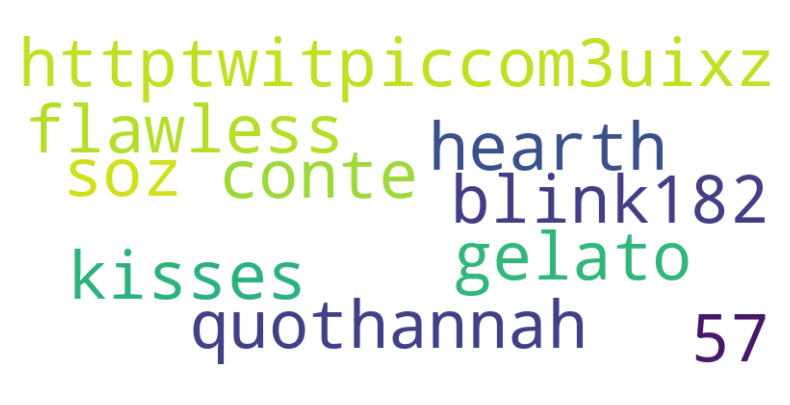

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear el WordCloud a partir de las palabras más relevantes del top 10
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_idf)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()

#### **1.8 Razón por la que mencionan a cada usuario**
#### **@myleycyrus.** Investigando sobre las menciones, se hace referencia a *blink182* posiblemente relacionado a la canción de esa banda *I Really Wish I Hated You* que es considerada una de las canciones más complejas que compusieron, ya que tuvo varias iteraciones, incluyendo una que consideraba la participación de Myley Cyrus  Con relación a *quothannah* puede tener relación con su rol como Hannah Montana en Disney.

#### **1.7.8.2 WordCloud @tommcfly**

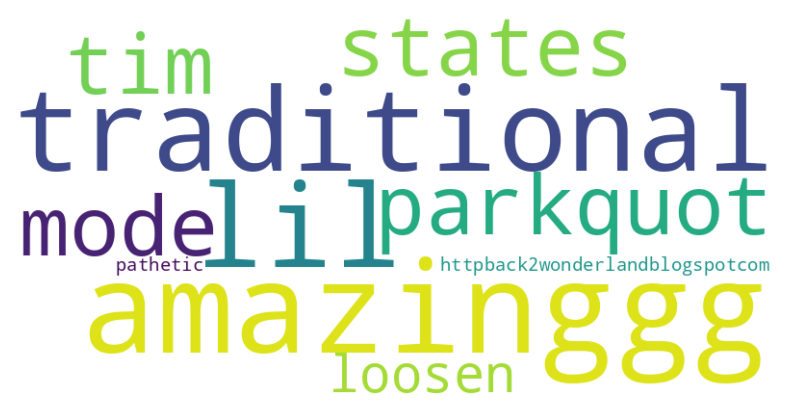

In [ ]:

# Crear el WordCloud a partir de las palabras más relevantes del top 10
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_idf2)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()

#### **1.8 Razón por la que mencionan a cada usuario**
#### **@tommcfly.** Luego del análisis y el wordcloud, el contexto de menciones, el usuario es un músico y compositor de una Banda llamada *Mcfly*, con relación a los términos en mencion no se encontró mayor referencia del contexto, puede estar relacionado con situaciones por las que el artista ha atravesado.

#### **1.7.8.2 WordCloud @ddlovato**

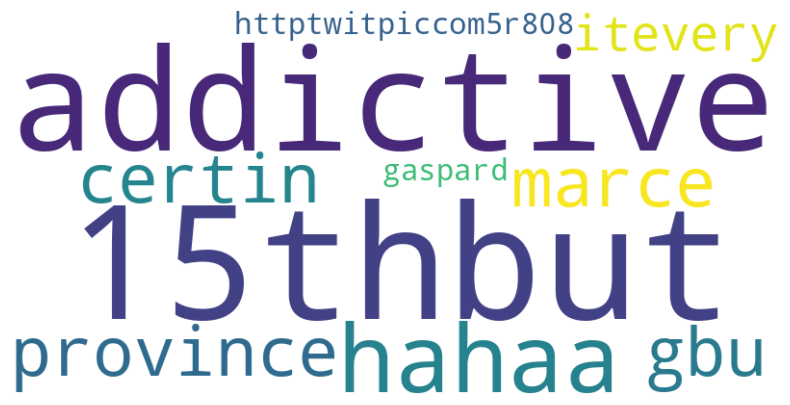

In [ ]:
# Crear el WordCloud a partir de las palabras más relevantes del top 10
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_idf3)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()

#### **1.8 Razón por la que mencionan a cada usuario**
#### **@ddlovato.** Luego del análisis y el wordcloud, el contexto de menciones, no se encontró mayor referencia a las palabras que surgen del análisis, únicamente un sencillo de la cantante denominado "Substance", y también noticias sobre la cantante que en algún momento tuvo sobredosis de medicamentos, posiblemente esté relacionado.

### **2. Problema 2** Fruits and Vegetables recognizer
#### Desarrollar un modelo de clasificación de imagenes basado en redes neuronales convolucionales (CNNs) capaz de distinguir entre diferentes tipos de frutas y vegetales, usando un conjunto de datos inicial centrado en imágenes.  El modelo deberá ser robust ante variaciones en tamaño, rotación y condiciones de iluminación de las imágenes.


#### **2.1 Importar librerías**

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

#### **2.2 Aumento de datos y normalización**

In [92]:
base_dir = '/content/drive/MyDrive/Proyecto_TxtMngImg/Selected_Classes'

# Aumento de datos y normalización
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Divide el conjunto en entrenamiento y validación
)

# Cargar imágenes desde el directorio
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Redimensionar imágenes
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Conjunto de entrenamiento
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Conjunto de validación
)

Found 2935 images belonging to 2 classes.
Found 733 images belonging to 2 classes.


#### **2.3 Modelo convolucional CNN**

In [93]:
# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Número de clases
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **2.4 Compilación de modelo**

In [94]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### **2.5 Entrenamiento de modelo**

In [95]:
# Entrenar el modelo
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/91 ━━━━━━━━━━━━━━━━━━━━ 27:20 23s/step - accuracy: 0.4921 - loss: 1.0035

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


91/91 ━━━━━━━━━━━━━━━━━━━━ 2695s 28s/step - accuracy: 0.5323 - loss: 0.7854 - val_accuracy: 0.8466 - val_loss: 0.4962
Epoch 2/30
 1/91 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6875 - loss: 0.6088

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.6875 - loss: 0.6088 - val_accuracy: 0.8276 - val_loss: 0.5566
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.7137 - loss: 0.5757 - val_accuracy: 0.6619 - val_loss: 0.6260
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.7671 - val_accuracy: 0.7586 - val_loss: 0.6370
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 427ms/step - accuracy: 0.8019 - loss: 0.4689 - val_accuracy: 0.7969 - val_loss: 0.3973
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.3728 - val_accuracy: 0.8621 - val_loss: 0.4123
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 432ms/step - accuracy: 0.8418 - loss: 0.3728 - val_accuracy: 0.8793 - val_loss: 0.2944
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8438 - loss: 0.2911 - val_accuracy: 0.8276 - val_loss: 0.2731
Epoch 9/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 81s 428ms/step - accuracy: 0.8940 - loss: 0.2903 - val_accuracy: 0.9233 - val_l

In [96]:
# Guardar el modelo
model.save('fruit_vegetable_classifier.h5')

#### **2.6 Test de modelo con imagen Potato.jpg**

In [97]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [98]:
def predict_image(img_path):
    img = image.load_img('/content/drive/MyDrive/Proyecto_TxtMngImg/Potato.jpg', target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalizar
    prediction = model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}  # Invertir diccionario
    predicted_class = class_indices[np.argmax(prediction)]
    return predicted_class

 # Obtener las clases
    class_indices = {v: k for k, v in train_generator.class_indices.items()}  # Invertir diccionario
    predicted_class = class_indices[np.argmax(prediction)]
    return predicted_class

In [99]:
resultado = predict_image('/content/drive/MyDrive/Proyecto_TxtMngImg/Potato.jpg')
print(f"La imagen es: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
La iamgen es: Vegetables
